In [2]:
import csv
import requests
from bs4 import BeautifulSoup
from langdetect import detect
import re

def determine_content_type(div_contant_img):
  if div_contant_img:
      if div_contant_img.find('div', class_='post-thumbnail-overlay-container'):
          content = "Video" 
      else:
          content = "Image" 
  else:
      content = "Text"
  return content


def clean_title(text):
    # Remove extra spaces and tabs
    text = re.sub(r'\s+', ' ', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    return text



def crawl_reddit_data(url):
    response = requests.get(url)
    html = response.text


    soup = BeautifulSoup(html, 'html.parser')

    i = 0

    big_div = soup.find('div', class_='rereddit-posts')  

    posts = []
    for post in big_div.find_all('div', class_='py-md px-md xs:px-0'):
        
        title = post.find('h3', class_='i18n-list-item-post-title').text
        title = clean_title(title)
        upvote_element = post.find('faceplate-number', class_='')
        upvote_number = upvote_element.get('number')
        upvotes = upvote_number

        comment_element = post.find_all('faceplate-number')[1]
        comment_number = comment_element.get('number')
        num_comments = comment_number
        div_contant_img = post.find('div', class_='flex shrink-0 ml-sm')
        # is_video = div_contant_img.find('div',class_='post-thumbnail-overlay-container')
        # print(">>>>>>.. Is div_contant_img:  " , div_contant_img)
        # print(">>>>>>.. Is Video:  " , is_video)
        content = determine_content_type(div_contant_img)
        # author = post.find('a', class_='_2tbHP6ZydRpjI44J3syuqC').text
        # content = post.find_all('div', class_='_1oQyIsiPHYt6nx7VOmd1sz')[-1].text  # Sửa cách lấy nội dung bài viết
        if title:
            try:
                language = detect(title)
            except Exception as e:
                print(f"Error detecting language: {e}")
                language = "Unknown"  
        else:
            language = "Unknown"

        i = i+1

        # print({"Post":i, "Title": title, "Upvotes": upvotes, "Num comments": num_comments, "Content": content, "Language": language})


        posts.append({
            'title': title,
            'upvotes': upvotes,
            'num_comments': num_comments,
            'content': content,
            'language': language 
        })

    return posts

def save_to_csv(data, filename):
    fields = ['title', 'upvotes', 'num_comments', 'content', 'language'] 

    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fields)

        writer.writeheader()

        for post in data:
            writer.writerow(post)

url = 'https://www.reddit.com/posts/2024/global/'
reddit_data = crawl_reddit_data(url)
save_to_csv(reddit_data,'reddit_top_post.csv')


Video
Video
Video
Video
Video
Video
Image
Video
Video
Video
Image
Video
Image
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Image
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Image
Video
Video
Video
Video
Video
Video
Image
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Image
Video
Video
Image
Video
Video
Video
Video
Video
Video
Video
Image
Image
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Error detecting language: No features in text.
Video
Video
Image
Image
Video
Video
Video
Image
Video
Image
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Image
Video
Video
Image
Video
Video
Video
Image
Video
Video
Video
Video
Image
Video
Image
Video
Video
Video
Video
Image
Video
Image
Video
Video
Video
Image
Video
Video
Video
Video
Video
Video
Image
Image
Video
Image
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Video
Image
Video
Video
Video

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

data = pd.read_csv('reddit_top_post.csv')

# Tách các biến đầu vào và biến mục tiêu
X = data['title']  # Sử dụng tiêu đề của bài viết làm đầu vào
y = data['language']  # Ngôn ngữ là biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vector hóa dữ liệu văn bản sử dụng TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Xây dựng mô hình phân loại (ví dụ: Support Vector Machine)
model = SVC()
model.fit(X_train_tfidf, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          da       0.00      0.00      0.00         2
          de       0.00      0.00      0.00         1
          en       0.86      1.00      0.92        42
          it       0.00      0.00      0.00         1
          pl       0.00      0.00      0.00         1
          so       1.00      1.00      1.00         1
          tl       0.00      0.00      0.00         2

    accuracy                           0.86        50
   macro avg       0.27      0.29      0.27        50
weighted avg       0.74      0.86      0.80        50



/home/vinhne/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinhne/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinhne/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Squared Error: 1.0688149719656828e-17


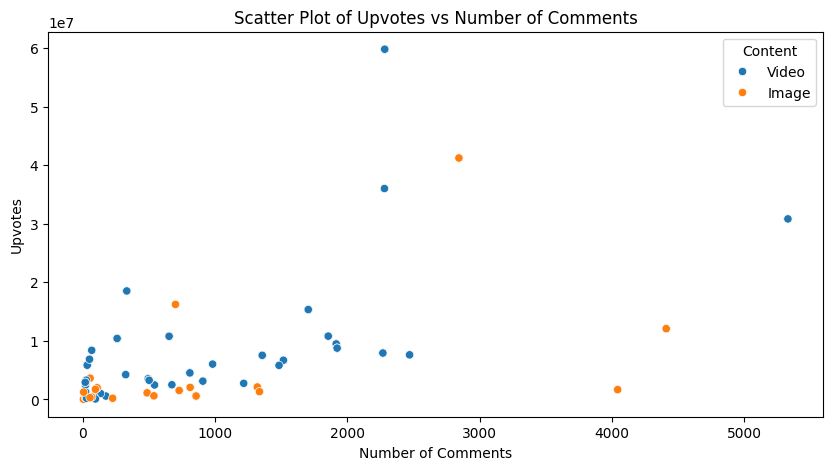

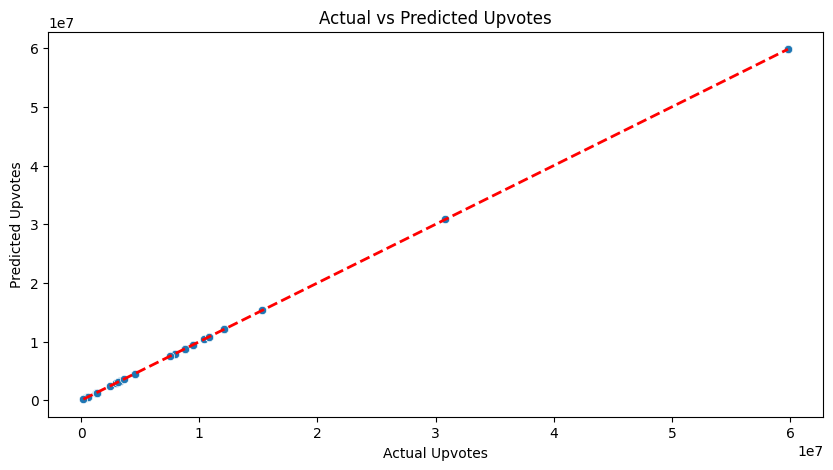

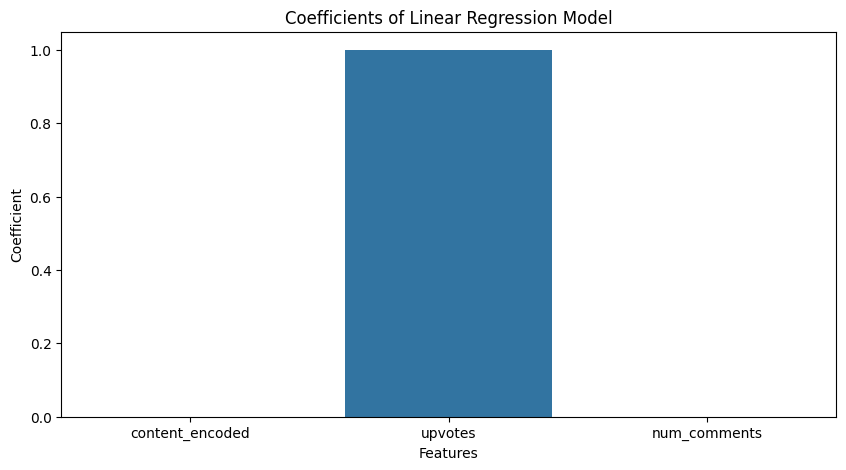

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ file CSV
data = pd.read_csv('reddit_top_post.csv')

# Chuẩn hóa dữ liệu: Biến đổi cột 'content' từ chuỗi thành các số nguyên
label_encoder = LabelEncoder()
data['content_encoded'] = label_encoder.fit_transform(data['content'])

# Chọn các đặc trưng (features) và biến mục tiêu (target)
X = data[['content_encoded', 'upvotes', 'num_comments']]
y = data['upvotes']  # Giả định 'upvotes' là biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Biểu đồ phân tán giữa 'num_comments' và 'upvotes'
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['num_comments'], y=data['upvotes'], hue=data['content'])
plt.title('Scatter Plot of Upvotes vs Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Upvotes')
plt.legend(title='Content')
plt.show()

# Biểu đồ hồi quy giữa giá trị thực tế và dự đoán
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs Predicted Upvotes')
plt.xlabel('Actual Upvotes')
plt.ylabel('Predicted Upvotes')
plt.show()

# Biểu đồ các hệ số hồi quy
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
plt.figure(figsize=(10, 5))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()
